<h1> Binary Classification </h1>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

redWine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
redWine["type"] = 0
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [94]:
whiteWine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
whiteWine["type"] = 1
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [95]:
# Merge two dataframe
wine = pd.concat([redWine, whiteWine])
print(wine.info())
wine.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


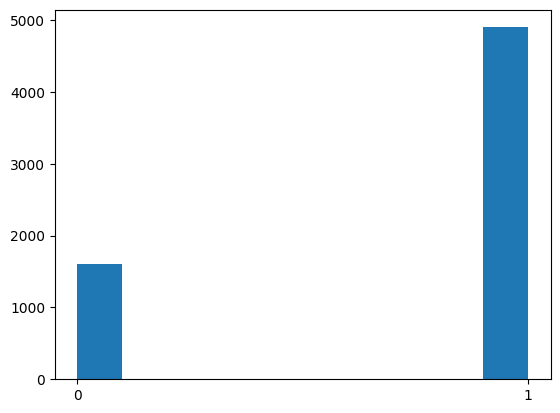

1    4898
0    1599
Name: type, dtype: int64


In [21]:
# 클래스 불균형이 존재하지 않는다고 판단
plt.hist(wine["type"])
plt.xticks([0,1])
plt.show()
print(wine["type"].value_counts())

In [31]:
# Min-Max Normalization and transformation
Wine = (wine - wine.min()) / (wine.max() - wine.min())
Wine = Wine.sample(frac=1)
Wine = Wine.to_numpy()
Wine[0]

array([0.3553719 , 0.31      , 0.10843373, 0.01993865, 0.1179402 ,
       0.04166667, 0.06682028, 0.19452477, 0.4496124 , 0.20786517,
       0.14492754, 0.5       , 0.        ])

In [36]:
# Setting training & test data
index = int(len(wine)*0.8)
train_x, train_y = Wine[:index, :-1], Wine[:index, -1]
test_x, test_y = Wine[index:, :-1], Wine[index:, -1]

# One-Hot Encoding on target
train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [39]:
# Model Structure
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=60, activation = "relu", input_shape=(12,)),
    tf.keras.layers.Dense(units=36, activation = "relu"),
    tf.keras.layers.Dense(units=12, activation = "relu"),
    tf.keras.layers.Dense(units=2, activation = "softmax")])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
             loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                780       
                                                                 
 dense_1 (Dense)             (None, 36)                2196      
                                                                 
 dense_2 (Dense)             (None, 12)                444       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 3,446
Trainable params: 3,446
Non-trainable params: 0
_________________________________________________________________


In [40]:
# model fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split = 0.25)

Epoch 1/50
 1/61 [..............................] - ETA: 10s - loss: 0.6188 - accuracy: 0.7500

2022-12-27 20:51:26.797865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


61/61 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9530 - val_loss: 0.0806 - val_accuracy: 0.9746
Epoch 2/50
61/61 [==============================] - 0s 813us/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.1466 - val_accuracy: 0.9608
Epoch 3/50
61/61 [==============================] - 0s 811us/step - loss: 0.0471 - accuracy: 0.9833 - val_loss: 0.0731 - val_accuracy: 0.9792
Epoch 4/50
61/61 [==============================] - 0s 793us/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0502 - val_accuracy: 0.9885
Epoch 5/50
61/61 [==============================] - 0s 829us/step - loss: 0.0308 - accuracy: 0.9913 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 6/50
61/61 [==============================] - 0s 809us/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0596 - val_accuracy: 0.9862
Epoch 7/50
61/61 [==============================] - 0s 788us/step - loss: 0.0356 - accuracy: 0.9913 - val_loss: 0.0498 - val_accuracy: 0.9877
Epoch 8/50
61/61 [=

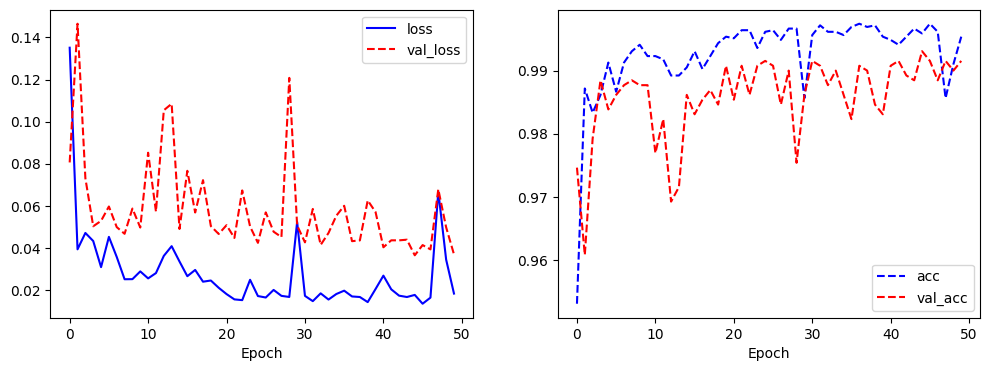

In [42]:
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b--", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [43]:
# Evaluating using test data
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 450us/step - loss: 0.0619 - accuracy: 0.9915


[0.06193184480071068, 0.9915384650230408]

# 

<h1> Multi-level Classification </h1>

In [96]:
print("levels :", np.unique(wine["quality"]))
wine["quality"].value_counts()

levels : [3 4 5 6 7 8 9]


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

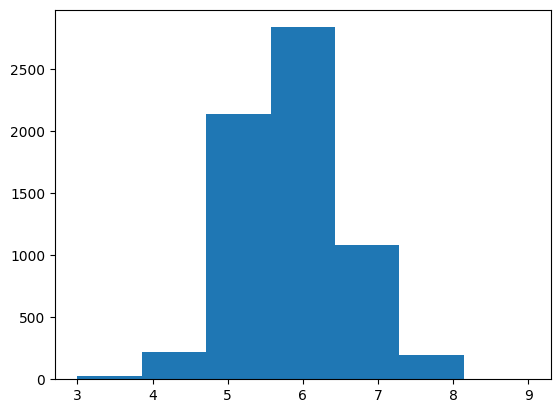

In [97]:
# 클래스가 불균형하므로 데이터를 3가지 종류로 구분
import matplotlib.pyplot as plt
plt.hist(wine["quality"], bins=7, rwidth=1)
plt.show()

In [98]:
# 0 -> bad, 1 -> normal, 2 -> good
wine.loc[wine["quality"]<6, "new_quality"] = 0
wine.loc[wine["quality"]==6, "new_quality"] = 1
wine.loc[wine["quality"]>6, "new_quality"] = 2

print(wine["new_quality"].value_counts())
print("levels :",np.unique(wine["new_quality"]))

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64
levels : [0. 1. 2.]


In [99]:
del wine["quality"]
Wine = (wine-wine.min())/(wine.max()-wine.min())
Wine = Wine.sample(frac=1)
Wine = Wine.to_numpy()

# Setting training & test data
index = int(len(wine)*0.8)
train_x, train_y = Wine[:index, :-1], Wine[:index, -1]
test_x, test_y = Wine[index:, :-1], Wine[index:, -1]

# One-Hot Encoding on target
train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)

In [100]:
# Model Structure and fitting
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=60, activation = "relu", input_shape=(12,)),
    tf.keras.layers.Dense(units=36, activation = "relu"),
    tf.keras.layers.Dense(units=12, activation = "relu"),
    tf.keras.layers.Dense(units=3, activation = "softmax")])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.25)

Epoch 1/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8001 - val_loss: 0.4086 - val_accuracy: 0.8238
Epoch 2/50
61/61 [==============================] - 0s 825us/step - loss: 0.4056 - accuracy: 0.8083 - val_loss: 0.3976 - val_accuracy: 0.8169
Epoch 3/50
61/61 [==============================] - 0s 822us/step - loss: 0.4013 - accuracy: 0.8119 - val_loss: 0.4264 - val_accuracy: 0.7838
Epoch 4/50
61/61 [==============================] - 0s 804us/step - loss: 0.3974 - accuracy: 0.8111 - val_loss: 0.3962 - val_accuracy: 0.8223
Epoch 5/50
61/61 [==============================] - 0s 810us/step - loss: 0.4036 - accuracy: 0.8124 - val_loss: 0.3979 - val_accuracy: 0.8085
Epoch 6/50
61/61 [==============================] - 0s 794us/step - loss: 0.3882 - accuracy: 0.8168 - val_loss: 0.4018 - val_accuracy: 0.8246
Epoch 7/50
61/61 [==============================] - 0s 799us/step - loss: 0.3906 - accuracy: 0.8191 - val_loss: 0.3925 - val_accuracy: 0.8223
Epoch 8/

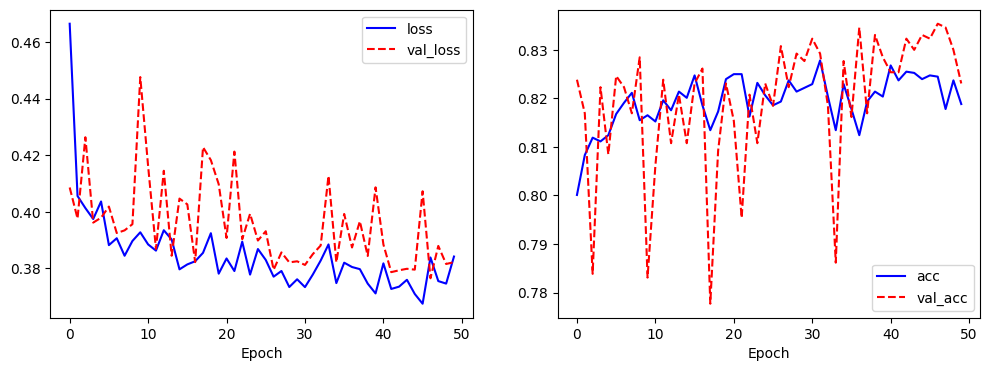

In [102]:
# Visualization model
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [103]:
# Evaluation using test data
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 476us/step - loss: 0.3875 - accuracy: 0.8231


[0.38753706216812134, 0.8230769038200378]